In [72]:
import pandas as pd
df = pd.read_csv("titanic_data_set.csv")
#df.head()

In [73]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [74]:
#Relation between Pclass and Survived
df.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [75]:
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [76]:
#Relation between Sex and survived
df.groupby('Sex').Survived.value_counts()

Sex     Survived
female  1           233
        0            81
male    0           468
        1           109
Name: Survived, dtype: int64

In [77]:
#importing matplotlib and seaborn
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

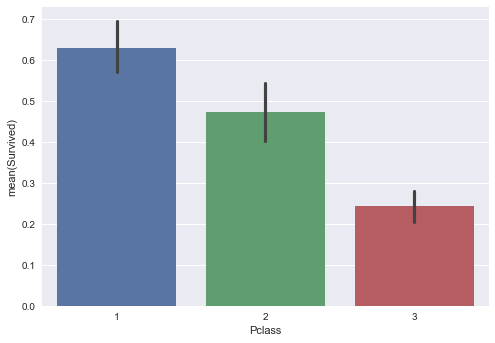

In [78]:
#barplot between pclass and survived
sns.barplot(x='Pclass', y='Survived', data=df)

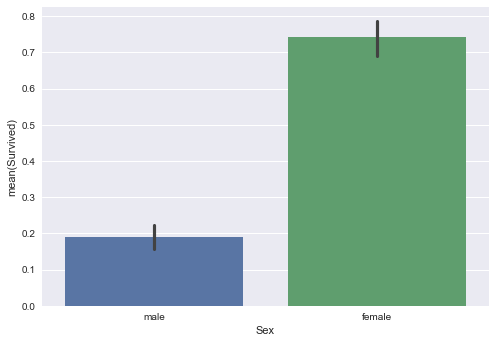

In [79]:
#barplot between sex and survived
sns.barplot(x='Sex', y='Survived', data=df)

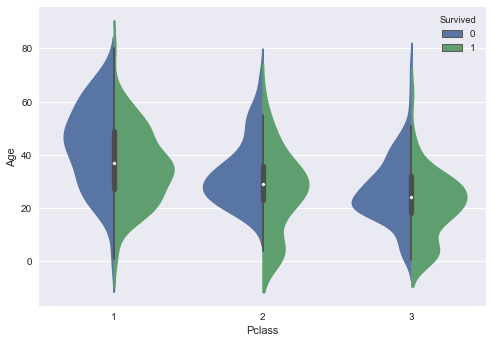

In [80]:
#violin plots
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)

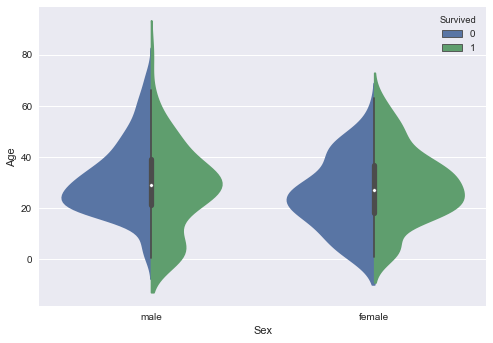

In [81]:
#violin plots
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True)

In [82]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [83]:
from sklearn.preprocessing import Imputer
age_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
age_imputer = age_imputer.fit(df.iloc[ : , [5]])
df.iloc[:, [5]] = age_imputer.transform(df.iloc[:, [5]])

In [84]:
#Missing values in Embarked
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [85]:
# S has the highest frequency
df['Embarked'] = df['Embarked'].fillna('S')

In [86]:
#Encoding Sex
from sklearn.preprocessing import LabelEncoder
labelencoder_sex = LabelEncoder()
df.iloc[:, [4]] = labelencoder_sex.fit_transform(df.iloc[:, [4]])

C:\Users\PRATIK\Anaconda3\envs\py35\lib\site-packages\sklearn\preprocessing\label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
#print (df.head())

In [88]:
#Encoding Embarked
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_embarked = LabelEncoder()
df.iloc[:, [11]] = labelencoder_embarked.fit_transform(df.iloc[:, [11]])
#print (df.head())

C:\Users\PRATIK\Anaconda3\envs\py35\lib\site-packages\sklearn\preprocessing\label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [89]:
df.Embarked.value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [90]:
#One Hot Encoding Pclass and Embarked
df = pd.get_dummies(df, columns=['Pclass', 'Embarked'])

In [91]:
#Combining Parch and Sibsp
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
#df.head()

In [92]:
#Feature selection
irrelevant_features = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin']
df = df.drop(irrelevant_features, axis=1)
#print(df.head())

In [95]:
#exporting the dataframe to a new csv file
df.to_csv('titanic_prepared_data.csv', index=False)